# ARBOL DE DECISIÓN
En este documento exploraremos el proceso de entrenamiento de un árbol de decisión, desde la elección de los hiperparámetros hasta la evaluación del rendimiento del modelo resultante. 

In [1]:
#Para comenzar, importaremos las bibliotecas y funciones necesarias que nos permitan realizar estas tareas. 
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import plot_tree
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# LECTURA DE DATOS Y ELECCION DEL ATRIBUTO OBJETIVO
Lo primero que hacemos es importar la biblioteca pandas, y leer el archivo csv. Luego, separamos los atributos en discretos y continuos para su posterior tratamiento. Finalmente, definimos el objetivo, que es una categoría binaria.

In [2]:

nodes = pd.read_csv('../Tablas/TablaAtributos.csv')
nodes.head(10)

,id,name,ml_target,Closeness_Centrality,Betweenness_Centrality,Degree_Centrality,Clustering_Coefficient,Triangles,Squares,K_Core,Comunidad,asyn_lpa_community
0,0,Eiryyy,0.0,0.275005,0.000000e+00,0.000027,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1,shawflying,0.0,0.294956,1.149733e-06,0.000212,0.178571,0.000062,0.072344,0.151515,0.002227,0.0
2,2,JpMCarrilho,1.0,0.261845,0.000000e+00,0.000027,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,3,SuhwanCha,0.0,0.278718,5.316292e-05,0.000133,0.000000,0.000000,0.019178,0.090909,0.004454,0.0
4,4,sunilangadi2,1.0,0.243084,6.134318e-09,0.000053,0.000000,0.000000,0.000000,0.030303,0.011136,0.0
5,5,j6montoya,0.0,0.343412,0.000000e+00,0.000027,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,6,sfate,0.0,0.372244,2.098552e-06,0.000159,0.333333,0.000062,0.038866,0.151515,0.000000,0.0
7,7,amituuush,0.0,0.320201,6.164540e-07,0.000212,0.321429,0.000112,0.054237,0.212121,0.000000,0.0
8,8,mauroherlein,0.0,0.351534,1.784020e-07,0.000212,0.750000,0.000262,0.057692,0.212121,0.002227,0.0
9,9,ParadoxZero,0.0,0.343590,2.711870e-05,0.000186,0.238095,0.000062,0.001971,0.121212,0.004454,0.0


In [3]:
ac=['Closeness_Centrality','Betweenness_Centrality','Degree_Centrality','Clustering_Coefficient','Triangles','Squares','K_Core', 'Comunidad','asyn_lpa_community']
ad=['name']
atributtes = nodes.loc[:, ['id']+ad + ac  ]

#Elegimos el atributo a predecir
y = nodes['ml_target']
atributtes.head(5)

,id,name,Closeness_Centrality,Betweenness_Centrality,Degree_Centrality,Clustering_Coefficient,Triangles,Squares,K_Core,Comunidad,asyn_lpa_community
0,0,Eiryyy,0.275005,0.000000e+00,0.000027,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1,shawflying,0.294956,1.149733e-06,0.000212,0.178571,0.000062,0.072344,0.151515,0.002227,0.0
2,2,JpMCarrilho,0.261845,0.000000e+00,0.000027,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,3,SuhwanCha,0.278718,5.316292e-05,0.000133,0.000000,0.000000,0.019178,0.090909,0.004454,0.0
4,4,sunilangadi2,0.243084,6.134318e-09,0.000053,0.000000,0.000000,0.000000,0.030303,0.011136,0.0


# PROCESAMIENTO DE LOS DATOS 
Los Arboles de decisión no trabajan con cadenas de texto por lo que debemos transformar las cadenas de texto a valores numericos. Luego normalizaremos estos valores entre 0 y 1, utilizando los valores máximo y el mínimo.

In [4]:

codificador_ad = OrdinalEncoder()
codificador_ad.fit(atributtes[ad])

OrdinalEncoder()

In [5]:
#Transformamos los datos
atributtes[ad] = codificador_ad.transform(atributtes[ad])

#Normalizamos la columna nombre 
scaler = MinMaxScaler(
    feature_range=(0, 1)
)
atributtes[ad] = scaler.fit_transform(atributtes[['name']])
atributtes.head(5)

,id,name,Closeness_Centrality,Betweenness_Centrality,Degree_Centrality,Clustering_Coefficient,Triangles,Squares,K_Core,Comunidad,asyn_lpa_community
0,0,0.061673,0.275005,0.000000e+00,0.000027,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1,0.929866,0.294956,1.149733e-06,0.000212,0.178571,0.000062,0.072344,0.151515,0.002227,0.0
2,2,0.106687,0.261845,0.000000e+00,0.000027,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,3,0.191517,0.278718,5.316292e-05,0.000133,0.000000,0.000000,0.019178,0.090909,0.004454,0.0
4,4,0.969442,0.243084,6.134318e-09,0.000053,0.000000,0.000000,0.000000,0.030303,0.011136,0.0


# SELECCIÓN DE HIPERPARÁMETROS
Seleccionaremos los mejores hiperparámetros para entrenar a nuestro árbol , utilizando la busqueda en rejilla, que combinará distintas configuraciones de hiperparámetros, probando profundidades máximas entre 3 y 10 y tamaños mínimos de 5, 10 y 15 ejemplos.

El árbol deberá tener una profundidad máxima de 5 nodos y 5 ejemplos pero se verá más adelante.

In [9]:
tub_tree= DecisionTreeClassifier()

# Definimos la rejilla de Hiperparámetros
Rhiperparámetros = {
    'max_depth': [3,4,5,6,7,8,9,10],
    'min_samples_split':[5,10,15]
}

#Busqueda de Rejilla con validacion cruzada
Rbusqueda = GridSearchCV( tub_tree, Rhiperparámetros, scoring ='recall', cv=10)
Rbusqueda.fit(atributtes, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [5, 10, 15]},
             scoring='recall')

In [10]:
#Imprimir los mejores hiperparametros encontrados 
Rbusqueda.best_score_
Rbusqueda.best_params_
print(f"Mejores hiperparámetros: {Rbusqueda.best_params_}")
print(f"Mejor puntaje de recall: {Rbusqueda.best_score_}")

Mejores hiperparámetros: {'max_depth': 5, 'min_samples_split': 5}
Mejor puntaje de recall: 0.57511844440552


# VALIDACIÓN
Ahora verificaremos la precisión de los resultados obtenidos de la búsqueda en rejilla. Dividiremos el conjunto de datos en un 80% para entrenamiento y un 20 % para pruebas.
Entrenaremos múltiples árboles de decisión con diferentes configuraciones de hiperparámetros para identificar cuál ofrece el mejor rendimiento, y luego evaluaremos el significado de estos rendimientos.

In [12]:

X_train, X_test, y_train, y_test = train_test_split(atributtes, y, test_size=0.2,stratify=y, random_state=42)

In [13]:
# Evaluar la diferentes configuraciones del modelo ArbolDecisión
configuraciones= [
    (3,3),
    (10,10),
    (5,5)
]

Configuración: max_depth=3, min_samples_split=3, Recall= 0.5626
      PN    PP
VN  5095   497
VP   852  1096
Configuración: max_depth=10, min_samples_split=10, Recall= 0.5411
      PN    PP
VN  5089   503
VP   894  1054
Configuración: max_depth=5, min_samples_split=5, Recall= 0.5549
      PN    PP
VN  5130   462
VP   867  1081


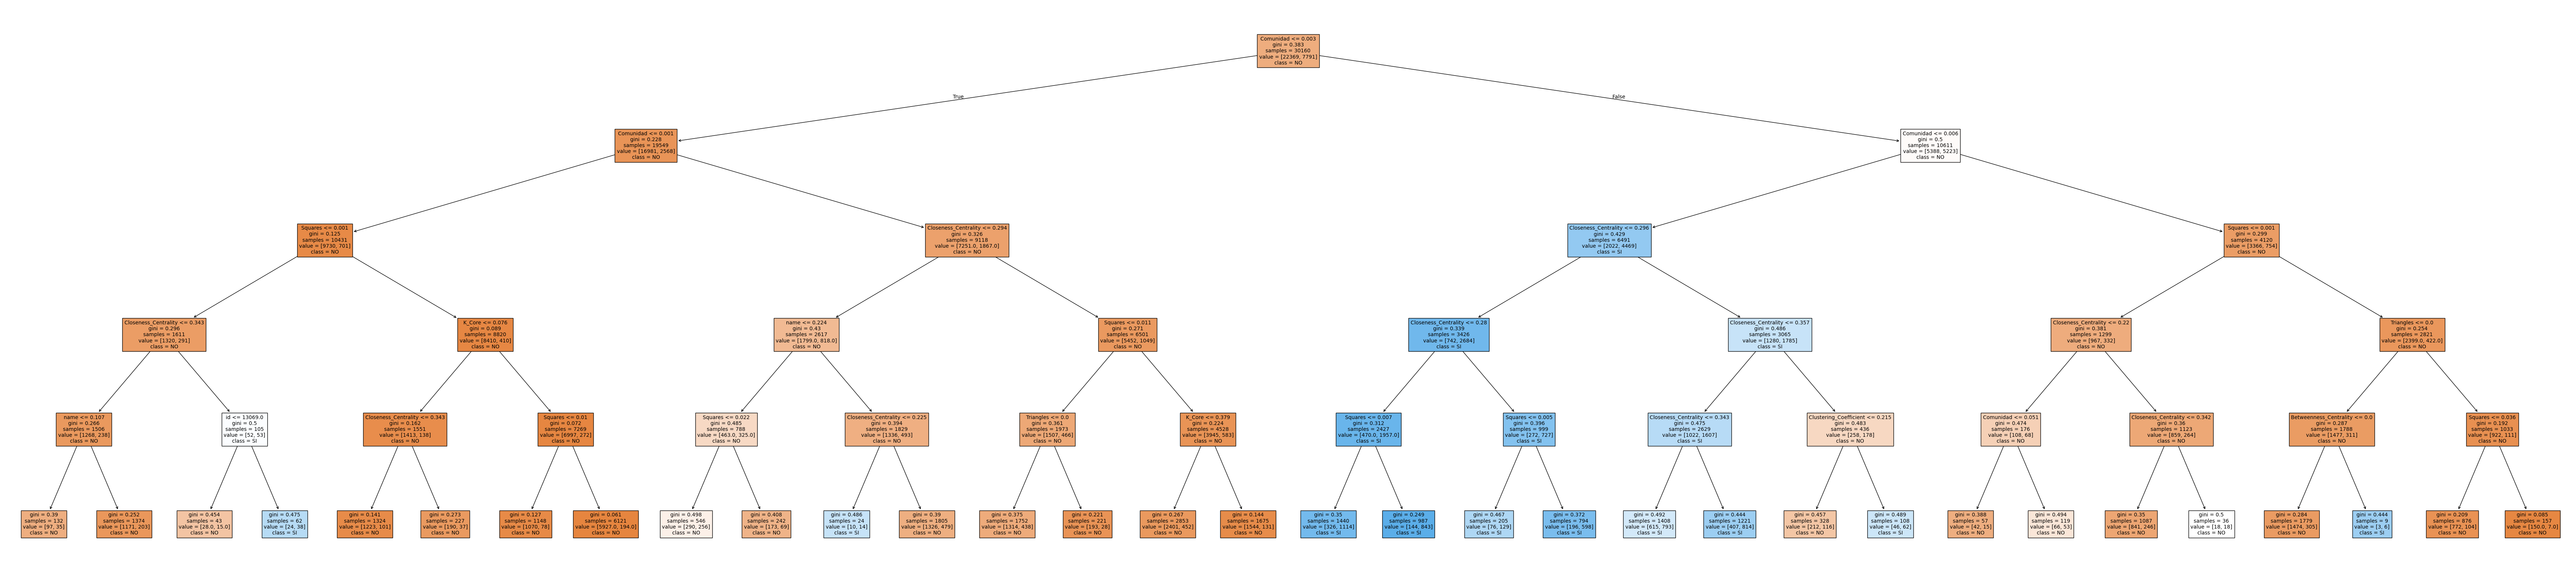

In [15]:
for max_depth, min_samples_split in configuraciones:
    clasificadorC = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split
    )
    # Entrenar al clasificador con los datos de entrenamiento
    clasificadorC.fit(X_train,y_train)

    # Predicciones
    predicciones= clasificadorC.predict(X_test)

    # Calcular el score de recall
    recall = recall_score(y_test,predicciones)
    print(f"Configuración: max_depth={max_depth}, min_samples_split={min_samples_split}, Recall= {recall:.4f}")

    # Calcular la matriz de confusión
    confusionM= confusion_matrix(y_test,predicciones)

    # Creamos la tabla 
    tabla_confusion = pd.DataFrame(confusionM, index=['VN', 'VP'], columns=['PN', 'PP'])
    print(tabla_confusion)

    if max_depth == 5:
        pyplot.figure(figsize=(90,20))
        plot_tree(clasificadorC,feature_names=atributtes.columns, class_names=['NO','SI'],
                  filled=True,fontsize=10)
        pyplot.savefig('arbol_de_decision.png')
        pyplot.show()


# ANÁLISIS Y CONCLUSIONES
Al ajustar los hiperparámetros del árbol de decisiones, encontramos que una profundidad máxima de 5 niveles y un mínimo de 5 ejemplos por nodo para la división ofrece un buen rendimiento, logrando un puntuaje medio de 0.5751 indicando una capacidad razonable para predecir las categorías objetivos.
Podemos observar que los resultados obtenidos de la validación cruzada y validación por retención son diferentes , esto se puede deber a varios factores , como al tamaño del conjunto de datos , la aleatoriedad en la partición ... 
Debido a que en la validación por retención indica que los mejores hiperparámetros son (5,5) y el la validación por retención indica que (3,3) tiene un mayor recall , utilizamos las soluciones dadas por la validación cruzada ya que proporciona una estimación más confiable del rendimiento del modelo.
 
 - **Interpretación de la Matriz de Confusión:**
La matriz de confusión muestra que el modelo clasifica correctamente la mayoria de los desarrolladores como desarrolladores web, que son la mayoria de nuestros datos. Sin embargo hay una cantidad significativa de falsos positivos, lo que suguiere margen para mejorar la precisión de desarrolladores IA.

En resumen , este análisis destaca la implementación y optimización de un Arbol de decisiones. Hemos logrado identificar el mejor valor de manera exitosa, sin embargo aunque predice bien los desarrolladores web, hay una notable cantidad de falsos positivos , posiblemente debido a la falta de ejemplos de desarrolladores de IA en el conjunto de datos. 
